In [10]:
########################################################################
## Pattern Recognition - Practice1 (Problem 1)
## Chung-Ang University
## Lecturer: Jongwon Choi (The graduate school of advanced imaging science, multimedia & film)
##           email: choijw@cau.ac.kr
########################################################################

# DO NOT USE ANY ADDITIONAL LIBRARY
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


## Data Setting (training/test dataset)

(400, 50)
(400,)


c:\Users\cau\anaconda3\envs\AI\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


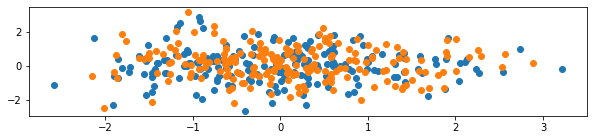

In [11]:
###################
## TRAINING DATA ##
###################
from operator import le


SIZE_TRAINING_DATA = 200
FEATURE_DIM = 50
np.random.seed(0)
feature_training = np.concatenate( (np.random.randn(SIZE_TRAINING_DATA, FEATURE_DIM), np.random.randn(SIZE_TRAINING_DATA, FEATURE_DIM) + 0.1), 0 )
label_training = np.concatenate( (np.zeros(SIZE_TRAINING_DATA), np.ones(SIZE_TRAINING_DATA)), 0)

# Plot the samples
f, ax = plt.subplots(1, figsize=(10, 2))

ax.scatter(feature_training[label_training==0, 0], feature_training[label_training==0, 1])
ax.scatter(feature_training[label_training==1, 0], feature_training[label_training==1, 1])
f.show()

print(feature_training.shape)
print(label_training.shape)

(40, 50)


c:\Users\cau\anaconda3\envs\AI\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


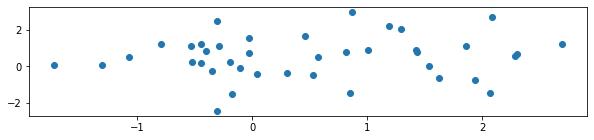

In [12]:
###############
## TEST DATA ##
###############
SIZE_TEST_DATA = 20
np.random.seed(1)
feature_test = np.concatenate( (np.random.randn(SIZE_TEST_DATA,FEATURE_DIM), np.random.randn(SIZE_TEST_DATA,FEATURE_DIM) + 1.0), 0 )

# Plot the samples
f, ax = plt.subplots(1, figsize=(10, 2))
ax.scatter(feature_test[:, 0], feature_test[:, 1])
f.show()

print(feature_test.shape)


## Problem 1 - A


In [13]:
import math

def euclidean_distance(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += (x1[i] - x2[i]) ** 2
        
    return math.sqrt(float(distance))

def kNN(k, training_data, label_training_data, test_data):
    distance = np.zeros((len(training_data), 2))
    label_test = np.zeros(len(test_data))

    for i in range(len(test_data)):
        for j in range(len(training_data)):
            distance[j, 0] = euclidean_distance(training_data[j], test_data[i])
            distance[j, 1] = label_training_data[j]

        # sort by distance
        distance = distance[distance[:, 0].argsort()]
        # select majority labels
        labels = distance[:k, 1].tolist()
        label_test[i] = max(set(labels), key=labels.count)

    return label_test

label_test = kNN(3, feature_training, label_training, feature_test)

In [14]:
# Plot the samples
def plot_kNN(x, y):
  f, ax = plt.subplots(1, figsize=(10, 2))
  ax.scatter(x[y==0, 0], x[y==0, 1])
  ax.scatter(x[y==1, 0], x[y==1, 1])
  f.show()

k = 1


c:\Users\cau\anaconda3\envs\AI\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


k = 3
k = 5
k = 7
k = 9


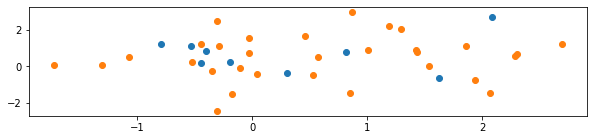

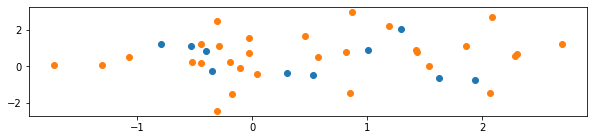

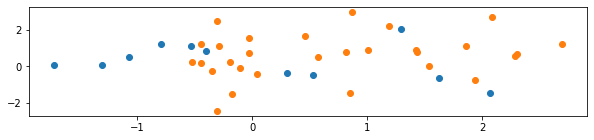

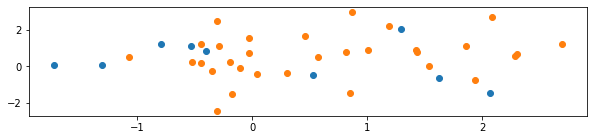

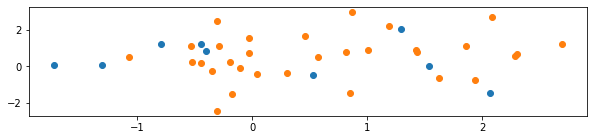

In [15]:
# Plot the samples when k=1,3,5,7,9
for k in (1,3,5,7,9):
  print(f'k = {k}')
  label_test = kNN(k, feature_training, label_training, feature_test)
  plot_kNN(feature_test, label_test)

## Problem 1 - B

In [16]:
def CrossValidation(k, training_data, label_training_data):
  error = 0
  # split training data: [0, 80, 160, 240, 320, 400]
  sliced_li = [i for i in range(0, len(training_data)+1, len(training_data) // 5)]

  # 5-fold cross-validation
  for i in range(5):
    # split to test data
    test_data = training_data[sliced_li[i]:sliced_li[i+1]]
    label_test_data = label_training_data[sliced_li[i]:sliced_li[i+1]]

    # delete test data from training_data
    test_index = [j for j in range(sliced_li[i], sliced_li[i+1])]
    train_data = np.delete(training_data, test_index, axis=0)
    label_train_data = np.delete(label_training_data, test_index, axis=0)

    #### BLANK ####
    pred = kNN(k, train_data, label_train_data, test_data)
    error += (pred != label_test_data).sum()
    
  return error

In [17]:
candidate_k = [1,3,5,7,9]
error_list = [0,0,0,0,0]
for i, k in enumerate(candidate_k):
  error = CrossValidation(k, feature_training, label_training)
  error_list[i] = error

In [18]:
# sort list_dist with the error by ascending order
best_k = candidate_k[sorted(range(len(error_list)), key=lambda k: error_list[k])[0]]
print(f'best hyperparameter k: {best_k}')

best hyperparameter k: 1


## Problem 1 - C

In [19]:

def bootstrap_kNN(k, num_bootstrap, training_data, label_training_data, test_data):
  boot_pred = np.zeros((num_bootstrap, len(test_data)))
  # start bootstrap
  train_index_li = [i for i in range(len(training_data))]
  for j in range(num_bootstrap):
    # randomly select index with replacement
    new_index = np.random.choice(train_index_li, len(training_data), replace=True)
    
    # bootstrapped train data and its labels
    train_data = training_data[new_index]
    train_label = label_training_data[new_index]

    pred_test = kNN(k, train_data, train_label, test_data)
    boot_pred[j, :] = pred_test

  # get mode value for each test data
  test_label_prediction = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=boot_pred.astype('int64'))

  return test_label_prediction

c:\Users\cau\anaconda3\envs\AI\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


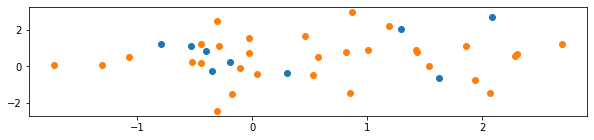

In [20]:
num_bootstrap = 5
label_test = bootstrap_kNN(best_k, num_bootstrap, feature_training, label_training, feature_test)

# Plot the samples
f, ax = plt.subplots(1, figsize=(10, 2))
ax.scatter(feature_test[label_test==0, 0], feature_test[label_test==0, 1])
ax.scatter(feature_test[label_test==1, 0], feature_test[label_test==1, 1])
f.show()

## Problem 1 - D

Problem 1-A : 0.3467888832092285
[0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.]
Problem 1-D : 0.0019996166229248047
[0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.]


c:\Users\cau\anaconda3\envs\AI\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


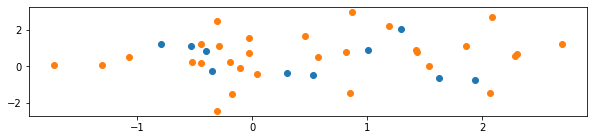

In [22]:
#############################################################
## Bonus Problem 1 - D
## For this problem, you need to show and compare the computational time of Problem 1-A and 1-D.
label_test = np.zeros(SIZE_TEST_DATA*2) # Estimate this by k-NN classifier (Double up the speed from Problem 1-A)

############################################################
def kNN_2(k, training_data, label_training_data, test_data):
  distance = np.zeros((len(test_data), len(training_data)))
  label_test = np.zeros(len(test_data))
  
  for i in range(len(test_data)):
      distance[i] = np.linalg.norm(test_data[i]-training_data, axis = 1)
      candidates = label_training_data[distance[i].argsort()[:k]].tolist()
      label_test[i] = max(set(candidates), key=candidates.count)
      
  return label_test

import time
start = time.time()
label_test = kNN(3, feature_training, label_training, feature_test)
print("Problem 1-A :", time.time() - start)
print(label_test)

start = time.time()
label_test = kNN_2(3, feature_training, label_training, feature_test)
print("Problem 1-D :", time.time() - start)
print(label_test)
############################################################

# Plot the samples
f, ax = plt.subplots(1, figsize=(10, 2))
ax.scatter(feature_test[label_test==0, 0], feature_test[label_test==0, 1])
ax.scatter(feature_test[label_test==1, 0], feature_test[label_test==1, 1])
f.show()